## Question 1 :
### What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.

## Ans
-------
1. **What are missing values in a dataset?**
   Missing values in a dataset refer to the absence of data or information for specific variables or observations. They are typically represented by special symbols or codes such as "NaN" (Not-a-Number) in Python's NumPy library, "NULL" in SQL databases, or simply left blank. Missing values can occur for various reasons, including data collection errors, equipment malfunction, non-responses in surveys, or incomplete records.

2. **Why is it essential to handle missing values?**
   Handling missing values is crucial for several reasons:
   - **Statistical Validity:** Missing data can lead to biased or inaccurate statistical analyses, which can impact decision-making and the quality of insights derived from the data.
   - **Model Performance:** Many machine learning algorithms cannot handle missing values, so addressing them is necessary to build reliable predictive models.
   - **Data Quality:** Missing values can reduce the overall quality of a dataset, affecting its usability for various analytical tasks.
   - **Ethical Considerations:** Making decisions based on incomplete or biased data can have ethical implications, especially in applications like healthcare or finance.

3. **Algorithms that are not affected by missing values:**
   While most machine learning algorithms require missing value imputation or handling, some are more robust and can work with missing data without much preprocessing. These algorithms include:
   - **Decision Trees:** Decision tree algorithms (e.g., CART, Random Forests) can naturally handle missing values by splitting nodes based on available features. They are robust to missing data but may require extra care when interpreting results.
   - **Random Forest:** Random Forest is an ensemble method that uses decision trees, making it capable of handling missing values in a similar manner.
   - **k-Nearest Neighbors (k-NN):** The k-NN algorithm can work with missing values by finding the nearest neighbors based on available features.
   - **Naive Bayes:** Naive Bayes is a probabilistic classifier that can be used with missing data, although it assumes independence between features.
   - **Principal Component Analysis (PCA):** PCA can be applied to datasets with missing values, although imputation may be necessary beforehand to maintain data integrity.
   - **Association Rule Mining:** Algorithms like Apriori or FP-growth can handle missing values by treating them as a separate category.


## Question 2 :
### List down techniques used to handle missing data. Give an example of each with python code.

## Ans
------
Here are some common techniques to handle missing data along with Python examples:

### 1. **Dropping Missing Values (Deletion):**
- This technique involves removing rows or columns with missing data.

In [30]:
import pandas as pd
# Create a sample DataFrame with missing values
data = {'A': [1, 2, None, 4, 5],
        'B': [9,None, 3, 4, 5]}
df = pd.DataFrame(data)
# Remove rows with any missing values
df_dropped_rows = df.dropna()
# Remove columns with any missing values
df_dropped_columns = df.dropna(axis=1)
df_dropped_rows.head()

,A,B
0,1.0,9.0
3,4.0,4.0
4,5.0,5.0


### 2. **Mean, Median, or Mode Imputation:**
- Replace missing values with the mean, median, or mode of the respective column.

In [40]:
# create a sample dataset with missing values
data = {'A': [1, 2, 3, None, 5, 90],
        'B': [6, None, 8, 9, 10, 200],
        'C': [11, 12, None, 14, 15, 100]}
df_with_outlier = pd.DataFrame(data)

data = {'Gender': ['M', 'F', 'F', np.nan, 'M', 'F', 'M'],
        'City': ['NYC', 'LA', np.nan, 'LA', 'LA', 'NYC', np.nan],
        'Age': [30, 40, 25, np.nan, np.nan, 35, 28],
        'Income': [50000, np.nan, 80000, 60000, 70000, np.nan, 90000]}
df_categorical = pd.DataFrame(data)

# Impute missing values with the mean of each column
df_mean_imputed = df.fillna(df.mean())

# Impute missing values with the median of each column
df_median_imputed = df_with_outlier.fillna(df.median())

# Impute missing values with the mode of each column
df_mode_imputed = df_categorical.fillna(df.mode().iloc[0])


In [41]:
df_mean_imputed,df_median_imputed,df_mode_imputed

(     A    B
 0  1.0  1.0
 1  2.0  2.0
 2  3.0  3.0
 3  4.0  4.0
 4  5.0  5.0,
       A      B      C
 0   1.0    6.0   11.0
 1   2.0    3.0   12.0
 2   3.0    8.0    NaN
 3   3.0    9.0   14.0
 4   5.0   10.0   15.0
 5  90.0  200.0  100.0,
   Gender City   Age   Income
 0      M  NYC  30.0  50000.0
 1      F   LA  40.0      NaN
 2      F  NaN  25.0  80000.0
 3    NaN   LA   NaN  60000.0
 4      M   LA   NaN  70000.0
 5      F  NYC  35.0      NaN
 6      M  NaN  28.0  90000.0)

### 3. **Forward Fill (or Backward Fill) Imputation:**
- Fill missing values with the previous (or next) non-missing value in the same column.

In [20]:
# Forward fill missing values
df_ffill = df.fillna(method='ffill')

# Backward fill missing values
df_bfill = df.fillna(method='bfill')
df,df_ffill,df_bfill

(     A    B
 0  1.0  9.0
 1  2.0  NaN
 2  NaN  3.0
 3  4.0  4.0
 4  5.0  5.0,
      A    B
 0  1.0  9.0
 1  2.0  9.0
 2  2.0  3.0
 3  4.0  4.0
 4  5.0  5.0,
      A    B
 0  1.0  9.0
 1  2.0  3.0
 2  4.0  3.0
 3  4.0  4.0
 4  5.0  5.0)

## 4.**Interpolation:**
- Interpolate missing values based on the values before and after the missing data points.

In [31]:
#Linear interpolation
df_interpolated = df.interpolate()

# Polynomial interpolation (order = 2)
df_poly_interpolated = df.interpolate(method='polynomial', order=2)

In [32]:
df,df_interpolated,df_poly_interpolated

(     A    B
 0  1.0  9.0
 1  2.0  NaN
 2  NaN  3.0
 3  4.0  4.0
 4  5.0  5.0,
      A    B
 0  1.0  9.0
 1  2.0  6.0
 2  3.0  3.0
 3  4.0  4.0
 4  5.0  5.0,
      A         B
 0  1.0  9.000000
 1  2.0  4.526316
 2  3.0  3.000000
 3  4.0  4.000000
 4  5.0  5.000000)

## 5. **K-Nearest Neighbors (K-NN) Imputation:**
- Impute missing values based on the values of their k-nearest neighbors.



In [33]:
from sklearn.impute import KNNImputer

# Create a KNN imputer with k=2
knn_imputer = KNNImputer(n_neighbors=2)

# Impute missing values using K-NN
df_knn_imputed = knn_imputer.fit_transform(df)

In [34]:
df,knn_imputer,df_knn_imputed

(     A    B
 0  1.0  9.0
 1  2.0  NaN
 2  NaN  3.0
 3  4.0  4.0
 4  5.0  5.0,
 KNNImputer(n_neighbors=2),
 array([[1. , 9. ],
        [2. , 6.5],
        [4.5, 3. ],
        [4. , 4. ],
        [5. , 5. ]]))

## 6. **Predictive Modeling (e.g., Regression Imputation):**
- Use regression models to predict missing values based on other features.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Create a sample DataFrame with missing values
data = {'A': [1, 2, None, 4, 5],
        'B': [11,None,33, 44, 55]}

df = pd.DataFrame(data)

# Split data into features (X) and target (y) where y contains missing values
X = df.dropna(subset=['A'])
y = df['A'].dropna()

# Create a LinearRegression model
reg_model = LinearRegression()

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Fit the model
reg_model.fit(X_imputed, y)

# Impute missing values in the original DataFrame for both columns
df_imputed = imputer.transform(df[['A', 'B']])

# Predict missing values
predicted_values = reg_model.predict(df_imputed)

# Update the original DataFrame with imputed values
df['A'] = np.where(df['A'].isnull(), predicted_values, df['A'])
df['B'] = np.where(df['B'].isnull(), predicted_values, df['B'])


In [54]:
df

,A,B
0,1.0,11.0
1,2.0,2.0
2,3.0,33.0
3,4.0,44.0
4,5.0,55.0


## Question 3 : 
### Explain the imbalanced data. What will happen if imbalanced data is not handled?

## Ans
------
**Imbalanced data** refers to a situation in a classification problem where the classes are not represented equally. In such a dataset, one class (the majority class) has significantly more instances than the other class or classes (the minority class or classes). Imbalanced data is a common issue in various domains, including fraud detection, medical diagnosis, and sentiment analysis.

Here's why imbalanced data is a concern and what can happen if it is not handled properly:

1. **Biased Models:** Machine learning algorithms tend to be biased towards the majority class because they aim to minimize a general error metric. If one class dominates the dataset, the algorithm may perform well on the majority class but poorly on the minority class. As a result, the model may struggle to correctly predict the minority class instances.

2. **Misclassification:** In imbalanced datasets, the minority class often has fewer samples, making it challenging for the model to learn and generalize from these instances. As a consequence, the model may misclassify or completely ignore the minority class, leading to false negatives and poor overall performance.

3. **Inflated Accuracy:** Accuracy is a common evaluation metric for classification models. In imbalanced datasets, a model that predicts the majority class for all instances can achieve a high accuracy rate, even though it's providing no useful information. This can lead to a false sense of model performance.

4. **Loss of Information:** Ignoring the minority class can result in a loss of valuable information. In applications like medical diagnosis or fraud detection, missing instances of the minority class can have severe consequences.

5. **Model Overfitting:** Imbalanced datasets can lead to overfitting, where a model learns the training data too well, capturing noise and making it less generalizable to unseen data.

To address imbalanced data, several techniques can be applied:

- **Resampling:** This involves either oversampling the minority class (adding more instances of the minority class) or undersampling the majority class (removing some instances from the majority class) to balance the dataset.

- **Synthetic Data Generation:** Techniques like SMOTE (Synthetic Minority Over-sampling Technique) generate synthetic examples of the minority class to balance the dataset.

- **Cost-sensitive Learning:** Modify the learning algorithm to give more weight or importance to the minority class during training.

- **Ensemble Methods:** Algorithms like Random Forest and Gradient Boosting can be effective with imbalanced data as they can assign different weights to each class and handle class imbalance more effectively.

- **Anomaly Detection Techniques:** For extreme class imbalance, consider treating the minority class as anomalies or outliers and use anomaly detection methods.

Handling imbalanced data is essential to ensure that machine learning models perform well and provide meaningful insights, especially in scenarios where the minority class is of particular interest or concern.

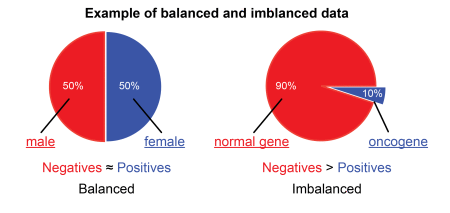

## Question 4 : 
### What are Up-sampling and Down-sampling? Explain with an example when up-sampling and downsampling are required

## Ans
-----
**Up-sampling** and **down-sampling** are techniques used to address the issue of imbalanced data in a classification problem:

1. **Up-sampling (Over-sampling):**
   - **Definition:** Up-sampling involves increasing the number of instances in the minority class to balance the class distribution.
   - **How it works:** This is typically done by randomly duplicating existing instances in the minority class or by generating synthetic samples that resemble the minority class.
   - **When to use up-sampling:** Up-sampling is often required when you have a classification problem with imbalanced data, and you want to give the minority class more weight to improve model performance.
   - **Example:** In a credit card fraud detection system, where the number of fraud cases is much smaller than non-fraud cases, up-sampling can be used to create more examples of fraudulent transactions to ensure that the model can learn to identify them effectively.

2. **Down-sampling (Under-sampling):**
   - **Definition:** Down-sampling involves reducing the number of instances in the majority class to balance the class distribution.
   - **How it works:** This is typically done by randomly removing instances from the majority class, ensuring that the class distribution becomes more balanced.
   - **When to use down-sampling:** Down-sampling is required when you have a classification problem with imbalanced data, and you want to reduce the influence of the majority class to prevent the model from being biased towards it.
   - **Example:** In a medical diagnosis scenario, where the number of healthy patients significantly outweighs the number of patients with a rare disease, down-sampling can be used to reduce the number of healthy patient samples, ensuring that the model pays more attention to detecting the rare disease.

Here's a more detailed example of when up-sampling and down-sampling might be required:

**Scenario: Fraud Detection in Online Transactions**
- **Problem:** You are building a machine learning model to detect fraudulent transactions in an online payment system.
- **Data Imbalance:** In your dataset, there are thousands of legitimate (non-fraudulent) transactions but only a few cases of fraud.
- **Challenges:**
  - The class imbalance makes it difficult for the model to learn the patterns of fraudulent transactions effectively.
  - Without addressing the imbalance, the model might classify most transactions as legitimate, leading to poor fraud detection.
- **Solution:**
  - **Up-sampling:** If you choose to up-sample, you would create more synthetic instances of fraudulent transactions by applying techniques like SMOTE or ADASYN. This balances the class distribution, ensuring the model has more data to learn from in the minority class.
  - **Down-sampling:** Alternatively, if you choose to down-sample, you would randomly reduce the number of legitimate transactions to create a more balanced dataset. This approach reduces the dominance of the majority class and prevents the model from being biased towards it.
- **Selection:** Whether you choose up-sampling, down-sampling, or a combination of both depends on the specific requirements of your problem and the characteristics of your data. You would typically experiment with both approaches and evaluate their impact on model performance to determine the best strategy for your fraud detection system.


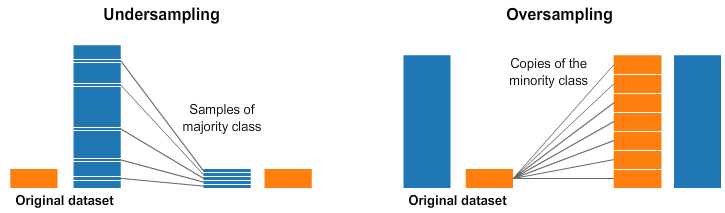


##  Question 5 :
### What is data Augmentation? Explain SMOTE.



## Ans
------
**Data augmentation** is a technique used in machine learning and data preprocessing to artificially increase the size of a dataset by creating new, synthetic data points. Data augmentation is commonly applied to improve the performance of machine learning models, especially in tasks like image classification, natural language processing, and imbalanced data classification.

The primary goal of data augmentation is to introduce variations into the dataset without changing the underlying patterns and relationships in the data. This helps the model generalize better and reduces overfitting, which occurs when a model becomes too specific to the training data and doesn't perform well on unseen data.

**SMOTE (Synthetic Minority Over-sampling Technique)** is a specific data augmentation technique used to address the problem of class imbalance in classification tasks, particularly for the minority class. It focuses on generating synthetic examples for the minority class to balance the class distribution. Here's how SMOTE works:

1. **Identifying Minority Class Instances:** SMOTE starts by identifying instances belonging to the minority class in the dataset.

2. **Selecting Neighbors:** For each minority class instance, SMOTE selects a specified number of its k-nearest neighbors from the same class. The value of k is a parameter that you can adjust.

3. **Creating Synthetic Examples:** For each selected minority class instance, SMOTE creates synthetic examples by interpolating between the features of the instance and its chosen neighbors. It does this by selecting a random neighbor and generating a new instance by combining the features of the original instance and the neighbor.

   For example, if you have two minority class instances A and B, and you select B as a neighbor of A, SMOTE will create a new instance that is a combination of features from A and B.

4. **Adding Synthetic Examples:** The newly generated synthetic examples are added to the dataset, effectively balancing the class distribution.

Here's a simplified example:

Suppose you have a dataset for credit card fraud detection, and the fraud cases (minority class) are much less frequent than non-fraud cases (majority class). You could use SMOTE to generate synthetic examples of fraud cases based on the existing ones. SMOTE would identify fraud cases, select their nearest neighbors among other fraud cases, and create synthetic fraud examples that are combinations of the original fraud cases and their neighbors.

SMOTE has the advantage of helping models learn the minority class better, reducing bias towards the majority class, and improving the model's ability to detect the minority class in imbalanced datasets. However, it's essential to use SMOTE judiciously and consider the potential risk of overfitting, especially when generating a large number of synthetic examples.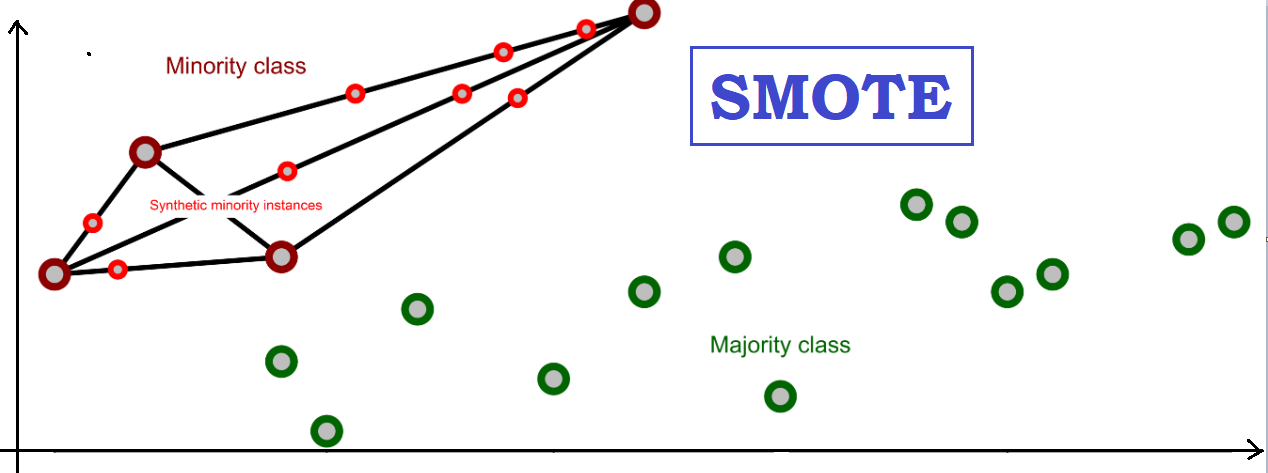

## Question 6 :
### What are outliers in a dataset? Why is it essential to handle outliers?


## Ans
_____
**Outliers** in a dataset are data points or observations that significantly differ from the majority of the data. These are extreme values that fall well outside the range of typical or expected values. Outliers can occur for various reasons, including data entry errors, measurement errors, natural variation in data, or the presence of anomalous events.

Here are a few key reasons why it is essential to handle outliers in a dataset:

1. **Impact on Descriptive Statistics:** Outliers can distort summary statistics such as the mean and standard deviation, making them less representative of the central tendency and spread of the data. This can lead to incorrect interpretations and skewed insights.

2. **Impact on Visualization:** Outliers can affect data visualizations by stretching or compressing the scale of plots. This can make it challenging to visualize the overall distribution and relationships within the data.

3. **Impact on Machine Learning Models:** Outliers can have a significant impact on the performance of machine learning models. Many algorithms are sensitive to outliers and may give them undue influence, leading to poor predictive performance.

4. **Model Assumptions:** Some statistical and machine learning models assume that data is normally distributed or that residuals are normally distributed. Outliers can violate these assumptions, leading to inaccurate model results.

5. **Robustness:** Handling outliers is crucial for building robust models that generalize well to new, unseen data. Models that are sensitive to outliers may perform poorly when faced with real-world data that contains outliers.

6. **Data Integrity:** Outliers may indicate data quality issues or errors in data collection processes. Handling outliers is essential to ensure the integrity and reliability of the dataset.

Methods to handle outliers include:

- **Outlier Removal:** One approach is to simply remove outliers from the dataset. However, this should be done with caution, as it can lead to a loss of information and potential bias if the outliers are genuinely part of the data distribution.

- **Transformation:** Applying mathematical transformations to the data, such as the logarithm or square root, can help mitigate the impact of outliers.

- **Winsorization:** Winsorization involves replacing extreme values with less extreme values, typically at a predefined percentile (e.g., replacing values above the 95th percentile with the value at the 95th percentile).

- **Clipping:** Similar to winsorization, clipping involves capping extreme values at a predefined threshold.

- **Robust Statistics:** Using robust statistical methods and models that are less sensitive to outliers can be an effective way to handle outliers in the analysis.

- **Imputation:** In some cases, outliers can be imputed with more reasonable values based on the distribution of the data.

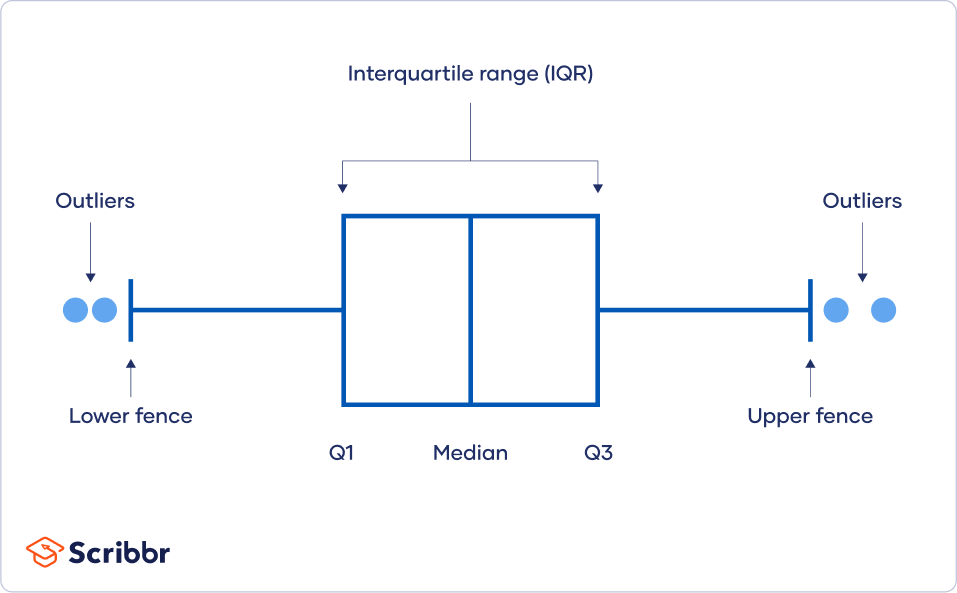

## Question 7 : 
### You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?

## Ans
--------
Handling missing data in customer data analysis is crucial for obtaining accurate and meaningful insights. Here are some techniques to consider when dealing with missing data in your analysis:

1. **Data Imputation:**
   - **Mean, Median, or Mode Imputation:** Replace missing values in numerical features with the mean, median, or mode of the respective feature. This is a simple method that can work when the missing data is missing at random and the missing values are not a large portion of the dataset.
   - **Forward Fill (or Backward Fill) Imputation:** For time-series or sequential data, you can fill missing values with the previous (or next) known value in the same column.
   - **Interpolation:** Use interpolation methods (e.g., linear or polynomial) to estimate missing values based on adjacent data points.
   - **K-Nearest Neighbors (K-NN) Imputation:** Impute missing values by averaging or interpolating the values of k-nearest neighbors based on other features.
   - **Advanced Imputation Methods:** Consider machine learning-based imputation methods like Iterative Imputer or predictive modeling to impute missing data more accurately.

2. **Data Exclusion:**
   - **Listwise Deletion:** Remove entire rows or columns with missing values. This method is straightforward but may result in a loss of valuable information, especially if there are many missing values.
   - **Pairwise Deletion:** Analyze only the available data for specific analyses, ignoring missing values for specific calculations. This can be useful when the missing data is missing at random.

3. **Categorical Handling:**
   - For categorical data, you can treat missing values as a separate category or create an "Unknown" category to avoid data loss. 

4. **Impute with Domain Knowledge:**
   - If you have domain knowledge, you can manually impute missing values based on your expertise. For example, if you know that missing values for income are likely to be low for students, you might impute them accordingly.

5. **Multiple Imputation:**
   - Use statistical methods like Multiple Imputation by Chained Equations (MICE) to create multiple imputed datasets, analyze each one separately, and then combine the results to account for uncertainty due to missing data.

6. **Feature Engineering:**
   - Create new features or derive meaningful information from existing features that can help fill in missing data indirectly.

7. **Data Collection and Preprocessing:**
   - Improve data collection procedures to minimize missing data in the first place. Ensure data is properly cleaned and preprocessed before analysis to identify and handle missing data effectively.

8. **Machine Learning Models:**
   - For predictive modeling, many machine learning algorithms can handle missing data (e.g., Decision Trees, Random Forests, k-NN). You can choose algorithms that are robust to missing values or use imputation techniques within your modeling pipeline.

The choice of technique depends on the nature of the missing data, the dataset's size, and the specific goals of your analysis.

## Question 8 : 
## You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?

## Ans
--------
When dealing with missing data in a large dataset, it's important to determine whether the missing data is missing at random (MAR) or if there is a pattern to it. Here are some strategies to help you assess the nature of the missing data:

1. **Summary Statistics:**
   - Calculate summary statistics separately for rows or columns with missing data and those without missing data. Compare these statistics to see if there are significant differences. For instance, check if the means or medians of numerical variables differ significantly between the two groups.

2. **Data Visualization:**
   - Create visualizations to compare the distribution of missing and non-missing data. For numerical data, you can use histograms or box plots. For categorical data, use bar plots or stacked bar plots to visualize differences in categories.
   - Create heatmaps to visualize missing data patterns across the dataset. Heatmaps can help identify correlations between missing values in different columns.

3. **Hypothesis Testing:**
   - Perform hypothesis tests to determine whether the missingness in a specific column is related to other variables. For example, you can use chi-squared tests for independence for categorical data or t-tests for numerical data.

4. **Correlation Analysis:**
   - Calculate correlations (e.g., Pearson correlation for numerical data or point-biserial correlation for binary data) to check if there's a relationship between the missingness of one variable and another. A significant correlation may suggest non-random missingness.

5. **Pattern Exploration:**
   - Explore the temporal or spatial patterns of missing data, especially in time-series or spatial datasets. Look for trends or clusters in the missing data.

6. **Domain Knowledge:**
   - Leverage domain knowledge or subject matter expertise to understand if there are reasons why certain data might be missing. Sometimes, missing data can be linked to specific events or conditions that domain experts can explain.

7. **Missing Data Indicators:**
   - Create indicator variables that flag missing data in specific columns. Then, analyze relationships between these indicators and other variables to identify patterns.

8. **Machine Learning Models:**
   - Train machine learning models to predict missing values based on other features. The importance of each feature in making predictions can help reveal patterns in missingness.

9. **Consulting Stakeholders:**
   - Engage with stakeholders or data collectors to gather insights into the data collection process and reasons behind missing data. They may provide valuable information about the nature of the missingness.

10. **Statistical Tests:**
    - Use statistical tests such as Little's MCAR Test, Missing Completely at Random (MCAR) Test, or Missing at Random (MAR) Test to formally assess the missing data mechanism. These tests can help determine if the missingness is likely random or not.



## Question 9 :
## Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?


## Ans
------
When dealing with imbalanced datasets in a medical diagnosis project, where the majority of patients do not have the condition of interest (often referred to as the negative class) and only a small percentage do (positive class), it's essential to use appropriate evaluation strategies to assess your machine learning model's performance effectively. Here are some strategies to consider:

1. **Resampling Techniques:**
   - **Up-sampling (Over-sampling):** Increase the number of instances in the minority class by duplicating or generating synthetic samples. This balances the class distribution.
   - **Down-sampling (Under-sampling):** Reduce the number of instances in the majority class by randomly removing samples. This balances the class distribution.
   - **SMOTE (Synthetic Minority Over-sampling Technique):** Generate synthetic examples of the minority class by interpolating between existing instances. This helps balance the dataset.

2. **Appropriate Performance Metrics:**
   - Avoid relying solely on accuracy, as it can be misleading in imbalanced datasets. Instead, focus on metrics such as:
     - **Precision:** Measures the proportion of true positive predictions among all positive predictions. It's crucial when minimizing false positives is important.
     - **Recall (Sensitivity):** Measures the proportion of true positives among all actual positives. It's crucial when detecting all positive cases is a priority.
     - **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure of a model's performance.
     - **Area Under the Receiver Operating Characteristic Curve (AUC-ROC):** Measures the model's ability to distinguish between positive and negative classes across different thresholds.

3. **Confusion Matrix Analysis:**
   - Examine the confusion matrix to understand the distribution of true positives, true negatives, false positives, and false negatives. This provides insights into which type of errors the model is making.

4. **Threshold Adjustment:**
   - Adjust the classification threshold to balance precision and recall based on the specific requirements of the medical diagnosis problem. A lower threshold increases recall but may reduce precision, while a higher threshold does the opposite.

5. **Cross-Validation:**
   - Use cross-validation techniques, such as stratified k-fold cross-validation, to ensure that your model's performance metrics are consistent across different data splits.

6. **Ensemble Methods:**
   - Consider using ensemble techniques like Random Forest or Gradient Boosting, which can handle class imbalance more effectively by assigning different weights to each class.

7. **Cost-sensitive Learning:**
   - Modify the machine learning algorithm to consider class imbalance by assigning different misclassification costs to different classes.

8. **Anomaly Detection:**
   - Treat the minority class as anomalies and use anomaly detection methods if applicable.

9. **Collect More Data:**
   - If possible, collect more data for the minority class to balance the dataset naturally.

10. **Feature Engineering:**
    - Carefully engineer features that are more discriminative for the minority class.

11. **Consult with Domain Experts:**
    - Collaborate with medical professionals to gain insights into the clinical significance of false positives and false negatives, and adjust the model's performance metrics accordingly.

12. **Model Interpretability:**
    - Ensure that the model's predictions are interpretable and explainable, particularly in healthcare applications where trust and accountability are critical.

13. **Regularization:**
    - Apply regularization techniques to prevent overfitting, especially when dealing with limited positive class samples.

It's important to choose a combination of these strategies based on the specific characteristics of your dataset and the clinical goals of your medical diagnosis project. Additionally, consult with domain experts and stakeholders to ensure that the evaluation metrics and model performance align with the desired clinical outcomes.

## Question 10 : 
## When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?

## Ans
-------
When dealing with an unbalanced dataset in a customer satisfaction project where the majority of customers report being satisfied, you can employ several methods to balance the dataset and down-sample the majority class. Down-sampling the majority class is one approach to address this issue. Here are some methods you can use:

1. **Random Under-sampling:**
   - Randomly select a subset of instances from the majority class to match the number of instances in the minority class. This is a straightforward method to balance the dataset, but it may lead to a loss of information.

2. **Cluster-Based Under-sampling:**
   - Use clustering algorithms (e.g., K-Means) to group similar instances from the majority class. Then, select representative instances from each cluster to form a balanced dataset.

3. **Tomek Links:**
   - Identify Tomek links, which are pairs of instances (one from the majority class and one from the minority class) that are closest to each other. Remove the majority class instance in each Tomek link, as they are often considered noisy or ambiguous samples.

4. **Edited Nearest Neighbors (ENN):**
   - Apply the ENN algorithm, which removes instances from the majority class if their class can be correctly predicted by their k-nearest neighbors in the minority class.

5. **NearMiss:**
   - Use the NearMiss algorithm, which selects instances from the majority class based on their distance to instances in the minority class. NearMiss has different variations, such as NearMiss-1, NearMiss-2, and NearMiss-3, each with its own criteria for selecting samples.

6. **Condensed Nearest Neighbor (CNN):**
   - Apply the CNN algorithm, which iteratively selects a subset of instances from the majority class that still allows for accurate classification.

7. **Synthetic Minority Over-sampling Technique (SMOTE):**
   - Although SMOTE is typically used for over-sampling the minority class, you can use a variation called SMOTE-ENN, which combines SMOTE for the minority class with ENN for the majority class to balance the dataset.

8. **Ensemble Techniques:**
   - Use ensemble methods such as EasyEnsemble or BalanceCascade, which train multiple classifiers on different subsets of the majority class and combine their predictions.

9. **Data Augmentation:**
   - For text or image data, you can apply data augmentation techniques to generate variations of the majority class samples, making the dataset more balanced.

10. **Cost-sensitive Learning:**
    - Modify the learning algorithm to consider class imbalance by assigning different misclassification costs to different classes.

11. **Collect More Data:**
    - Whenever possible, collect more data for the minority class to balance the dataset naturally.

12. **Stratified Sampling:**
    - When splitting the dataset into training and testing sets, use stratified sampling to ensure that both sets maintain the same class distribution as the original dataset.

The choice of method depends on the specific characteristics of your dataset and the goals of your customer satisfaction project. It's advisable to experiment with different approaches and evaluate their impact on model performance to determine the most suitable strategy for your analysis.

## Question 11 : # You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?

## Ans
------
When dealing with an unbalanced dataset, particularly when you're working on a project that requires estimating the occurrence of a rare event (i.e., the minority class), you can employ several methods to balance the dataset and up-sample the minority class. Up-sampling the minority class is a common approach to address this issue. Here are some methods you can use:

1. **Random Over-sampling:**
   - Randomly duplicate instances from the minority class until it matches the size of the majority class. While simple, it may lead to overfitting if not done carefully.

2. **Synthetic Minority Over-sampling Technique (SMOTE):**
   - Generate synthetic examples for the minority class by interpolating between existing instances. SMOTE creates new samples by combining the features of a minority class instance with those of its nearest neighbors. This method helps increase the size of the minority class while introducing diversity.
   
3. **ADASYN (Adaptive Synthetic Sampling):**
   - ADASYN is an extension of SMOTE that focuses on generating more synthetic samples near the decision boundary, where the classification is more challenging. This can lead to better model generalization.

4. **Borderline-SMOTE:**
   - A variation of SMOTE that focuses on generating synthetic samples only for borderline instances, which are minority class instances near the decision boundary.

5. **SMOTE-ENN (SMOTE combined with Edited Nearest Neighbors):**
   - This combines over-sampling (SMOTE) with under-sampling (ENN) to create a balanced dataset. SMOTE is applied to the minority class, and then ENN is used to remove potentially noisy examples from both classes.

6. **SMOTE-Tomek (SMOTE combined with Tomek links):**
   - This combines SMOTE with Tomek links to clean the dataset while balancing it. Tomek links are pairs of instances from different classes that are very close to each other. SMOTE is applied to the minority class, and Tomek links are used to remove any overlapping instances from both classes.

7. **Random Forest with Balanced Subsamples:**
   - When using Random Forest or other ensemble methods, you can train individual trees on balanced subsamples of the data, where each subsample includes both classes in equal proportions. The predictions from multiple trees can then be combined.

8. **Cost-sensitive Learning:**
   - Modify the learning algorithm to consider class imbalance by assigning different misclassification costs to different classes.

9. **Collect More Data:**
   - If feasible, consider collecting additional data for the minority class to balance the dataset naturally.

10. **Anomaly Detection:**
    - Treat the minority class as anomalies and apply anomaly detection techniques if applicable.

11. **Generate Synthetic Features:**
    - Create new features or derive information from existing features that can help distinguish between the minority and majority classes.

The choice of method depends on the nature of your dataset, the problem you're solving, and the specific goals of your project. It's advisable to experiment with different approaches and evaluate their impact on model performance to determine the most suitable strategy for your analysis.